<a href="https://colab.research.google.com/github/SeptiLutfiana/PCVK_Ganjil_2023/blob/main/Week10_Septi_Lutfiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KELOMPOK 3
- SEPTI LUTFIANA - 2141720038
- LUCAS VALENTINO -  2141720032
- M. IZZAMUL FIKRI FAHMI - 2141720038

## Import Folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

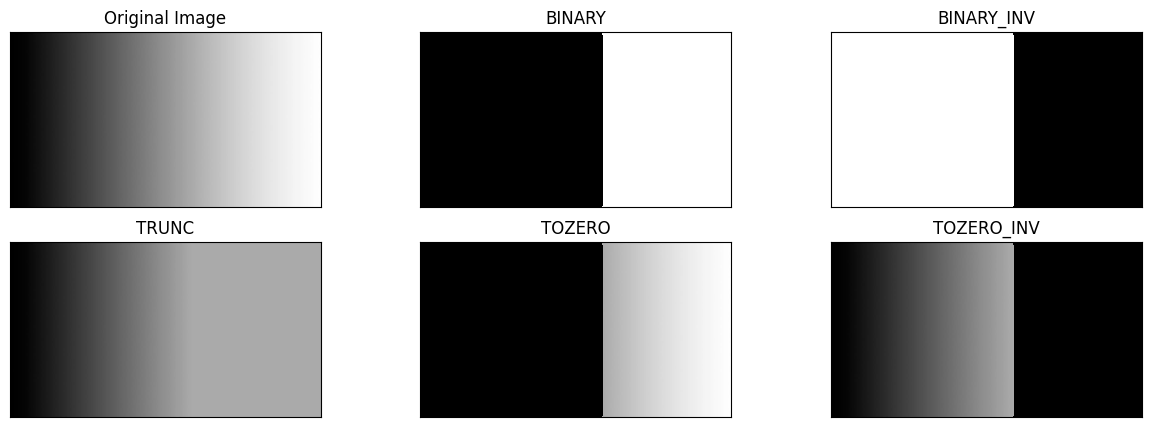

In [4]:
dir = '/content/drive/MyDrive/PCVK/gradient.jpg'
img = cv2.imread(dir)
thresholdBinary = cv2.imread(dir)
thresholdTrunc = cv2.imread(dir)
thresholdTozero = cv2.imread(dir)

threshold = 170

# Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

# Threshold Truncate
thresholdTrunc[img>threshold] = threshold

# Threshold Tozero
thresholdTozero[img<=threshold] = 0

# Threshold Binary Inverted
_, thresholdBinaryInv = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)

# Threshold Tozero Inverted
_, thresholdTozeroInv = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV)

names = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresholdBinary,thresholdBinaryInv, thresholdTrunc, thresholdTozero, thresholdTozeroInv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(names[i])
    plt.xticks([]), plt.yticks([])

plt.show()


 Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-7-7017a610db6b>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


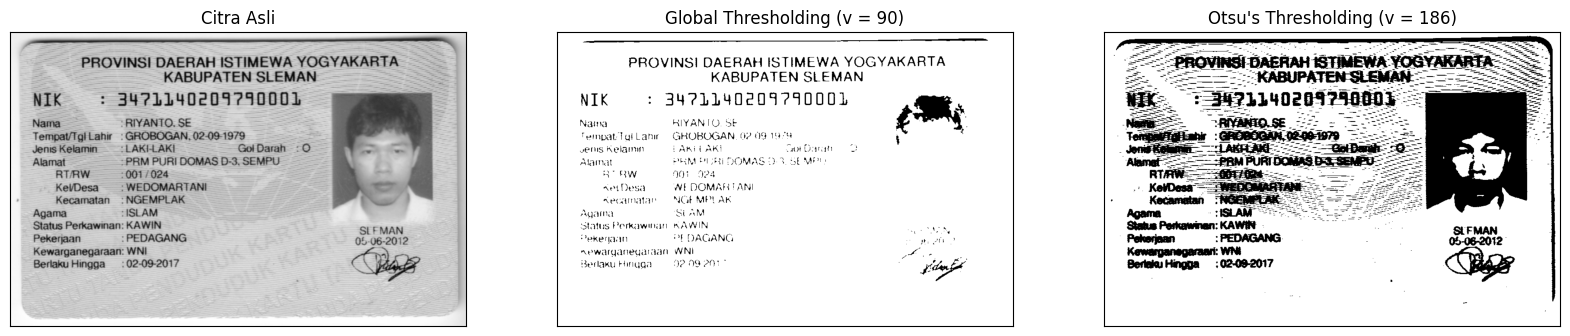

In [7]:
dir = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(dir,0)
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,187):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold(blur, threshold, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 90)', x]
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

*   anda dapat gunakan cv.calcHist untuk menampilkan histogram.

*   Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
*Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).
  

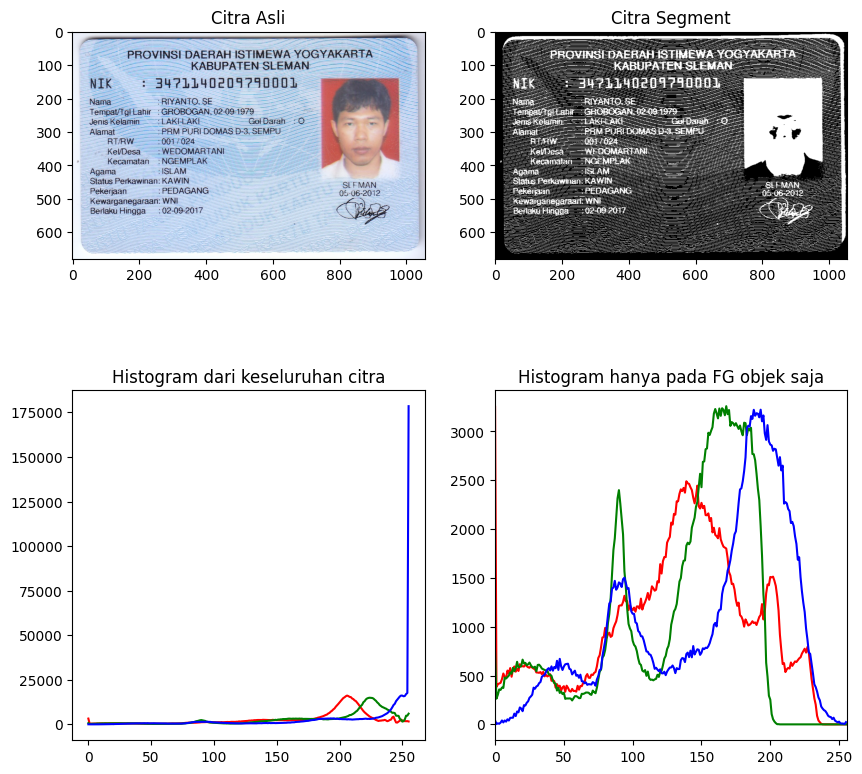

In [8]:
dir = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    histogramSeluruhCitra = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col)
    plt.title('Histogram dari keseluruhan citra')
    histogramForeground = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7986545f4820>)

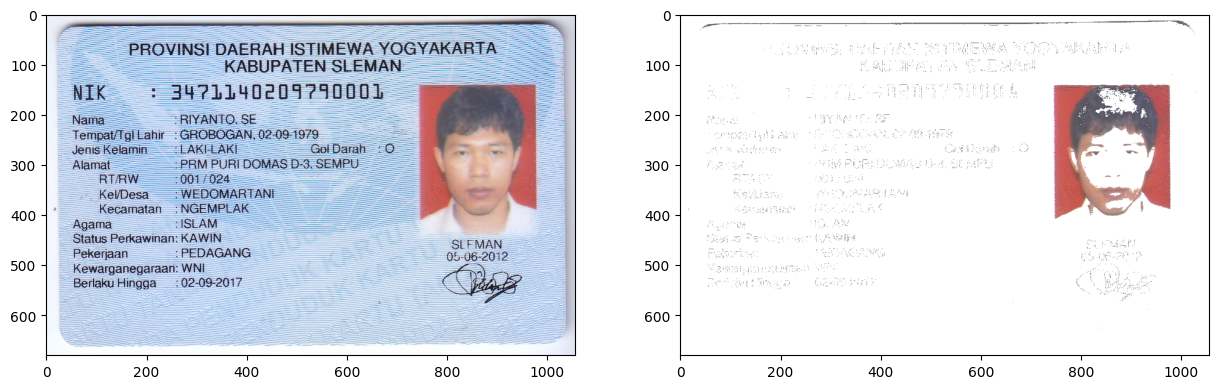

In [10]:
dir = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = np.copy(img)
segmented_image0= segmented_image.reshape((-1, 3))
segmented_image0[labels != 1] = [255, 255, 255]
segmented_image0 = segmented_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image0)

Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

- Binary Threshold - RIYANTO.SE

(<Axes: >, <matplotlib.image.AxesImage at 0x7986545adab0>)

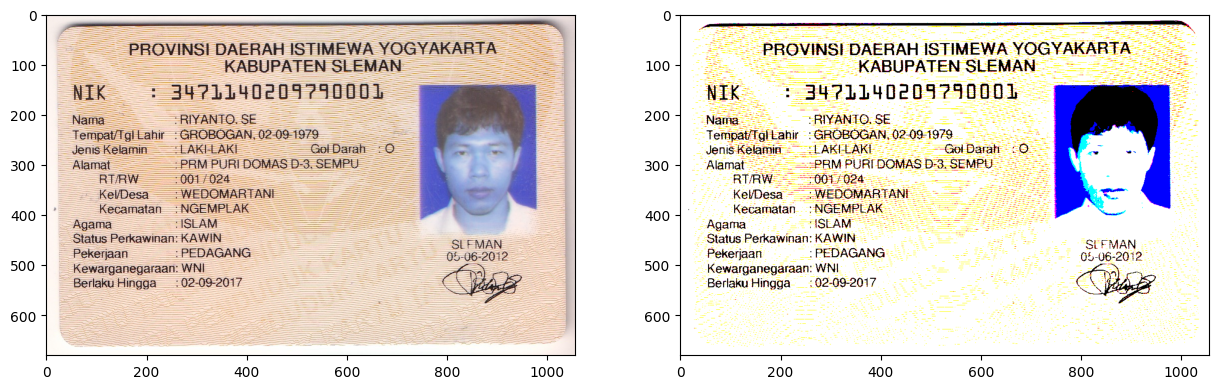

In [12]:
dir = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv2.imread(dir)
thresholdBinary = cv2.imread(dir)

threshold = 130

#Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

names = ['Original Image','BINARY']
images = [img, thresholdBinary]


plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(thresholdBinary)

- Binary-Inverted Galang Raka Pratama

(<Axes: >, <matplotlib.image.AxesImage at 0x798655c89cc0>)

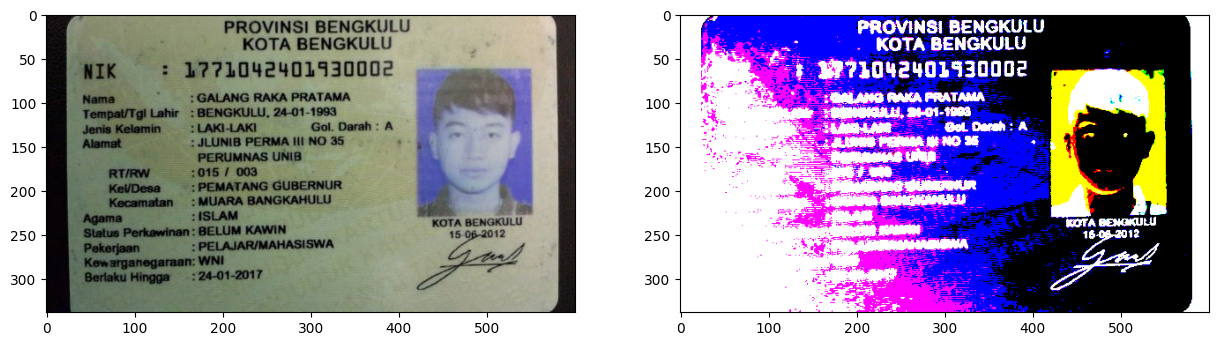

In [13]:
dir = ('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
img = cv2.imread(dir)
thresholdBinaryInv = cv2.imread(dir)

threshold = 130
#Threshold Binary-Inverted
thresholdBinaryInv[img>threshold] = 0
thresholdBinaryInv[img<=threshold] = 255

names = ['Original Image','BINARY-INVERTED']
images = [img, thresholdBinaryInv]


plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(thresholdBinaryInv)

- Truncate Threshold

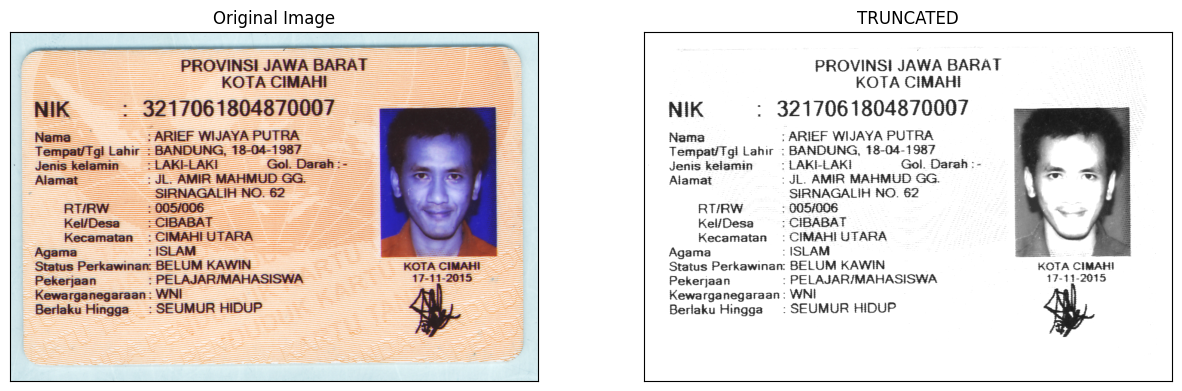

In [24]:

dir = '/content/drive/MyDrive/PCVK/KTP_More/ktp2.png'
img = cv2.imread(dir)

threshold = 130
max_value = 255

#grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold Binary-Inverted
_, thresholdBinaryInv = cv2.threshold(gray_img, threshold, max_value, cv2.THRESH_BINARY_INV)

# Threshold Truncated
_, thresholdTrunc = cv2.threshold(gray_img, threshold, max_value, cv2.THRESH_TRUNC)

names = ['Original Image',  'TRUNCATED']
images = [img, thresholdTrunc]

plt.figure(figsize=(15, 12))
for i in range(len(names)):
    plt.subplot(1, len(names), i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

- Threshold To Zero

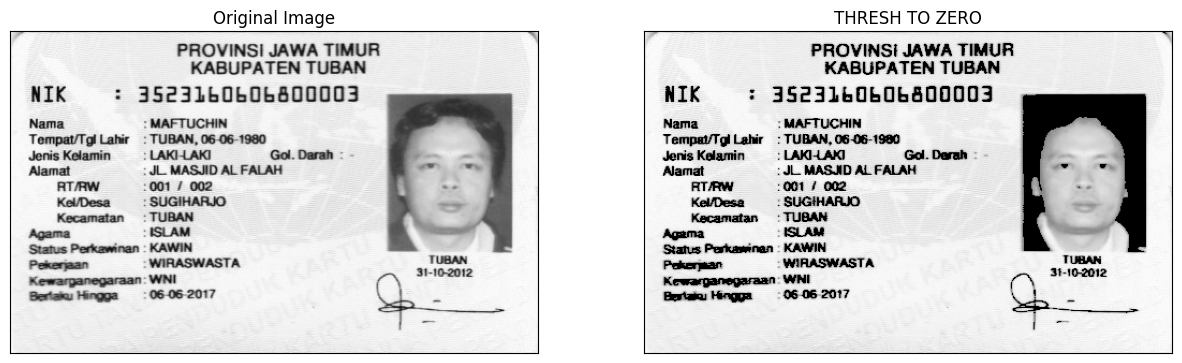

In [27]:
dir = '/content/drive/MyDrive/PCVK/KTP_More/ktp3.png'
img = cv2.imread(dir, 0)  # Read the image as grayscale

threshold = 130
max_value = 255

# Threshold to Zero
_, thresholdToZero = cv2.threshold(img, threshold, max_value, cv2.THRESH_TOZERO)

nama = ['Original Image', 'THRESH TO ZERO']
images = [img, thresholdToZero]

plt.figure(figsize=(15, 12))
for i in range(len(nama)):
    plt.subplot(1, len(nama), i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(nama[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

- Threshold To Zero – Inverted

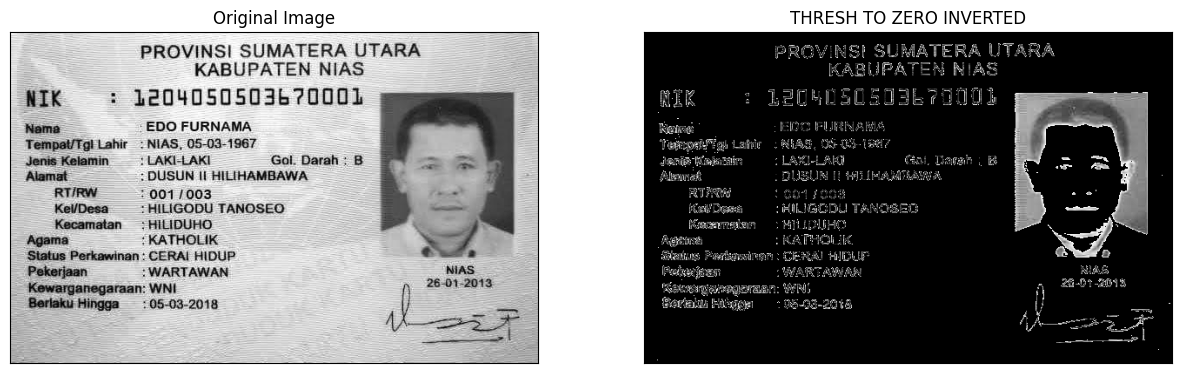

In [31]:
dir = '/content/drive/MyDrive/PCVK/KTP_More/ktp5.png'
img = cv2.imread(dir, 0)  # Read the image as grayscale

threshold = 130
max_value = 255

# Threshold to Zero -inv
_, thresholdTozeroInv = cv2.threshold(img, threshold, max_value, cv2.THRESH_TOZERO_INV)

nama = ['Original Image', 'THRESH TO ZERO INVERTED']
images = [img, thresholdTozeroInv]

plt.figure(figsize=(15, 12))
for i in range(len(nama)):
    plt.subplot(1, len(nama), i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(nama[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Adaptive Threshold

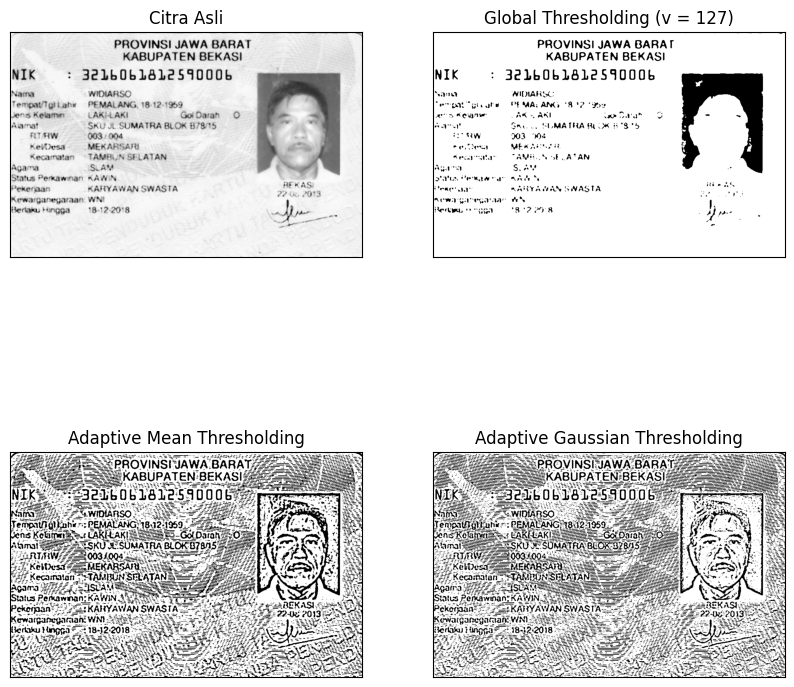

In [32]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp6.png')
citra = cv2.medianBlur(cv2.imread(filename),5)
gray = cv2.cvtColor(citra, cv2.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

Otsu’s Threshold

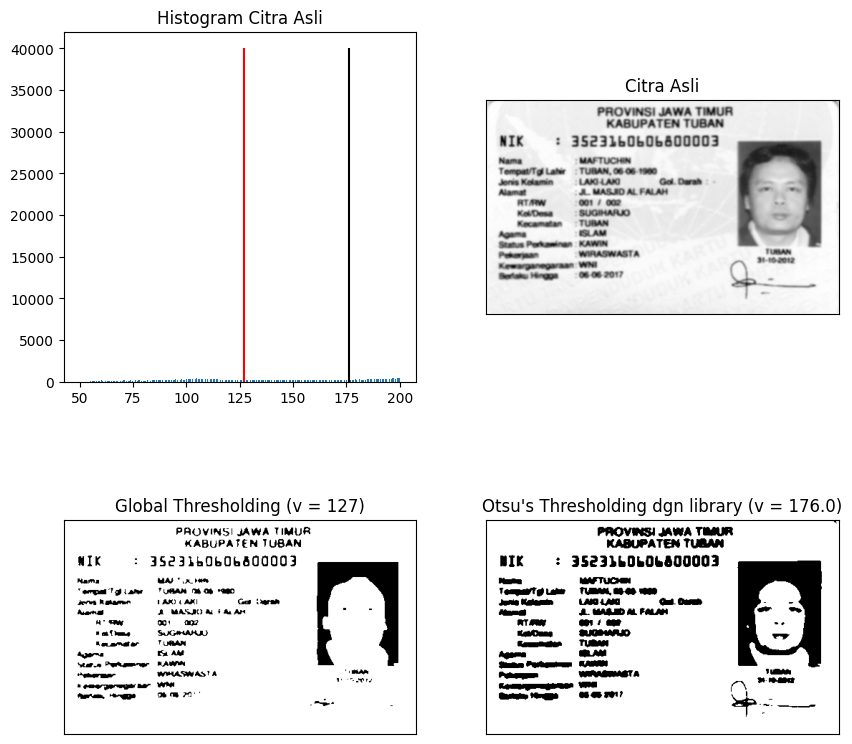

In [33]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

Otsu’s tanpa Gaussian Filter dan dengan
menggunakan Gaussian Filter.

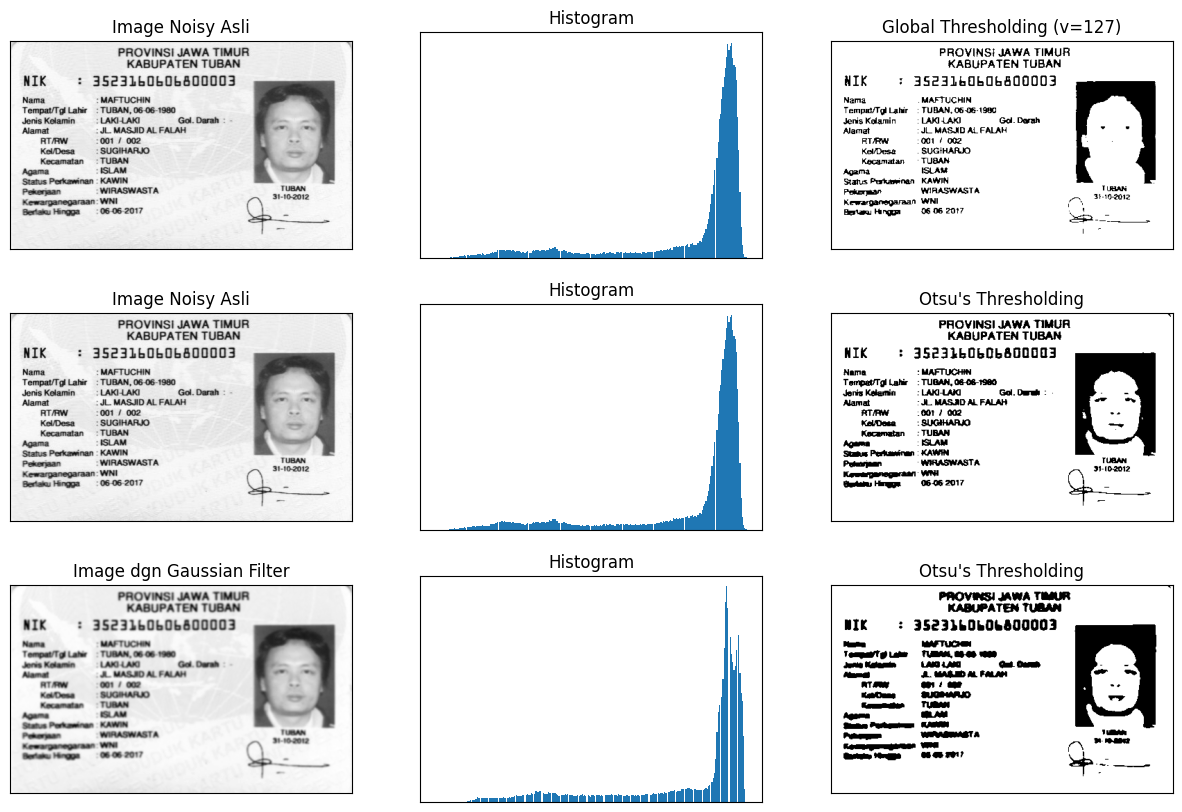

In [34]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')
img = cv2.imread(filename,0)
#Global Thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)', 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Sementasi Citra menggunakan K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x79864cb2cc70>)

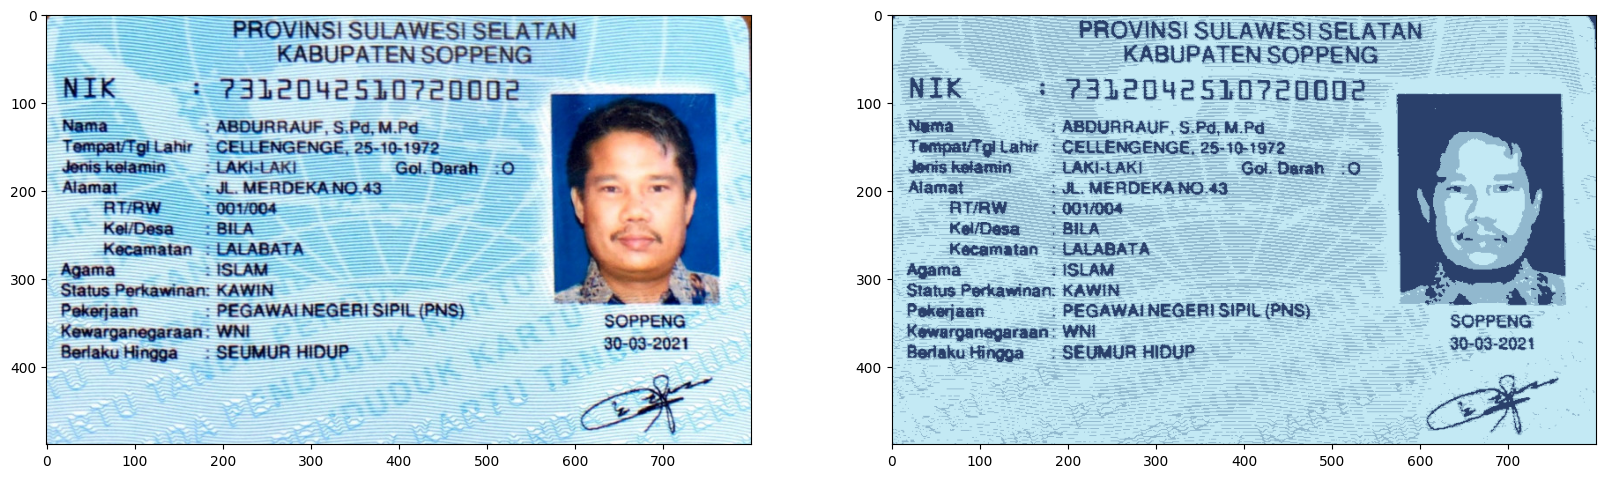

In [39]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/KTP_More/KTP7.jpeg'
)
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)